# AI in Production: Data Science Tools

### Artificial Intelligence For Public Health (CHL5408)

This notebook is meant to accompany [these slides](https://docs.google.com/presentation/d/1c6e9xpnUUDc6vHu-EkfCj8SucchdFckLiKCmzMnLbuc/edit?usp=sharing). Intended audience is graduate public health students. 

![The Case](thecase.png)

## Data Science Methodology

<img src="https://i.ibb.co/SKJDYGQ/Screenshot-2023-03-26-at-9-47-57-AM.png" alt="Jupyter Logo" style="height: 300px;"/>

We want to walk through today's case in a structured & systematic manner. As Data Science itself is fairly nascent industry, there are not that many well established methodologies for conducting it. The diagram shared above, is coming from IBM who is a leader in this field. You can learn more about it [here](https://developer.ibm.com/blogs/following-the-data-science-methodology/)

It's a structured way to think about, plan, and organize your work. You will notice that it's inspired from agile methodologies. Instead of betting everything on a "big bang" launch, an agile team delivers work in small, but consumable, increments. Requirements, plans, and results are evaluated continuously so teams have a natural mechanism for responding to change quickly. 

It's comprised of five iterative steps, and within those steps you have sub-categories that assist data scientists.

#### 1. Problem Understanding

Every customer request starts with a problem, and the data scientist's job is first to understand it and approach this problem with statistical and machine learning techniques. The Business Understanding stage is crucial because it helps to clarify the goal of the customer. In this stage, we have to ask a lot of questions to the customer about every single aspect of the problem; in this manner, we are sure that we will study data related, and at the end of this stage, we will have a list of business requirements. The first step to that is understanding the business what is the business dealing with, what is their input, what is the final output given by the business, and what are the other factors that lead to the final output. 

The next step is the Analytic Approach, where, once the business problem has been clearly stated, the data scientist can define the analytic approach to solve the problem. This step entails expressing the problem in the context of statistical and machine-learning techniques, and it is essential because it helps identify what type of patterns will be needed to address the question most effectively. If the issue is to determine the probabilities of something, then a predictive model might be used; if the question is to show relationships, a descriptive approach may be required, and if our problem requires counts, then statistical analysis is the best way to solve it. For each type of approach, we can use different algorithms.

#### 2. Data Requirements & Collection

Data Requirements is the stage where we identify the necessary data content, formats, and sources for initial data collection, and we use this data inside the algorithm of the approach we chose.

In the Data Collection Stage, data scientists identify the available data resources relevant to the problem domain. 

We have traditional data sources that that may be available to us from an institutions (i.e. ICES, hospital, local public health). There are also creative ways of getting access to data. Such as web scraping, or using APIs that we will tackle today.

#### 3. Data Understanding & Preparation
In the Data Understanding stage, data scientists try to understand more about the data collected before. We have to check the type of each data and to learn more about the attributes and their names. Data dictionaries are amazing, but may not always be there. Data dictionaries also have limits. (What's supposed to be in a field vs. what is actually there)

In the Data Preparation stage, data scientists prepare data for modeling, which is one of the most crucial steps because the model has to be clean and without errors.


#### 3. Modeling & Evaluation


Figuring out which model to use is, what assumptions each model makes, and what works for your data.

Evaluating models is a whole domain in itself. Key readings:

* [The medical algorithmic audit](https://www.thelancet.com/journals/landig/article/PIIS2589-7500(22)00003-6/fulltext)
* [Do no harm: a roadmap for responsible machine learning for health care](https://www.nature.com/articles/s41591-019-0548-6)
* [Model Cards for Model Reporting](https://arxiv.org/abs/1810.03993)

#### 4. Deployment, Monitoring, and Feedback


Once you have established confidence in the model, the next step is to move towards the deployment phase, where the model is released to a restricted group of people to obtain feedback on the predictions and assess its suitability for public use. Following deployment, feedback is collected from the users, enabling further refinement, evaluation, and subsequent deployment iterations until a final model is achieved. Upon finalization, the model can be deployed for use by a broader audience.

<div style="padding: 10px; border: 2px black solid;">

## <font color='green'>New Tool Alert:</font> Git
    
<img src="https://miro.medium.com/max/910/1*Wjxx83j-qyiNvFBy1yOA1w.jpeg" alt="Git Logo" style="height: 300px;"/>

**What is it**: Git is a software that helps you keep track of changes to files in a folder on your PC. After making some changes to files in this folder, you can “commit” the changes to Git for safe-keeping. These changes could be creating, renaming, deleting a file or subfolder; or editing the content of a file.

**Why use it**: Git lets you keep track of changes over time and revert back when needed.

**Download**: Install from [here](https://git-scm.com/downloads)

**Resources**: Cheat sheet [here](https://i.redd.it/8341g68g1v7y.png)

</div>

<div style="padding: 10px; border: 2px black solid;">

## <font color='green'>New Tool Alert:</font> Github
    
<img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" alt="Github Logo" style="height: 300px;"/>

**What is it**: Github lets you keep a copy of your local git repositories in the cloud

**Why use it**: It lets you share and collaborate with others via Git's version control.

**Download**: Create an account [here](https://github.com/)

</div>

## Environment Set Up

<div style="padding: 10px; border: 2px black solid;">

## <font color='green'>New Tool Alert:</font> Anaconda
    
<img src="https://upload.wikimedia.org/wikipedia/en/thumb/c/cd/Anaconda_Logo.png/440px-Anaconda_Logo.png" alt="Anaconda Logo" style="height: 100px;"/>

**What is it**: Anaconda is a distribution of the Python and R programming languages for scientific computing, that aims to simplify package management and deployment. The distribution includes data-science packages suitable for Windows, Linux, and macOS.

**Why use it**: Anaconda lets you easily create and manage various environment with isolated dependencies.
 
**Download**: Download from [here](https://www.anaconda.com/products/individual)
    
**Resources**: Conda cheat sheet [here](https://docs.conda.io/projects/conda/en/4.6.0/_downloads/52a95608c49671267e40c689e0bc00ca/conda-cheatsheet.pdf)
    
</div>

### Setting Up Anaconda Environment and Installing Jupyter Notebooks

After installing anaconda, open up your command prompt or terminal window

Create a new environment
```
conda create --name dstools

```

To see if the command worked and list all your environments run
```
conda env list
```

<img src="./list.png" alt="Image Info" style="height: 300px;"/>

Now activate the environment by running
```
conda activate dstools
```

Finally install jupyter notebooks
```
conda install jupyter notebook
```

Now lunch jupyter notebook by typing
```
jupyter notebook
```

<div style="padding: 10px; border: 2px black solid;">

## <font color='green'>New Tool Alert:</font> Jupyter Notebook
    
<img src="https://www.dataquest.io/wp-content/uploads/2019/01/1-LPnY8nOLg4S6_TG0DEXwsg-1.png" alt="Jupyter Logo" style="height: 300px;"/>

**What is it**: A Jupyter notebook is a document that supports mixing executable code, equations, visualizations, and narrative text. Specifically, Jupyter notebooks allow the user to bring together data, code, and prose, to tell an interactive, computational story. Jupyter notebook is free and open source and supports over 100 programming languages including Python, Java, R, Julia, Matlab, Octave, Scheme, Processing, Scala, and many more

**Why use it**: Jupyter is an interactive environment that can be shared with anyone. They can run through the code, collaborate and understand the story by mixing formatted text with the code.

**Download**: Install from [here](https://jupyter.org/install)

**Resources**: Cheat sheet [here](https://www.edureka.co/blog/wp-content/uploads/2018/10/Jupyter_Notebook_CheatSheet_Edureka.pdf)

</div>

This will open a new tab in your default web browser that should look something like the following screenshot.

![Jupyter](Jupyter.png)

This is the Notebook Dashboard, specifically designed for managing your Jupyter Notebooks. Think of it as the launchpad for exploring, editing and creating your notebooks.

You can create a new notebook by clicking New in the top right hand corner

![Markdown](New.png)

This lets you create a new notebook. Currently the only option is Python. However if you have other kernels installed (such as R) you would see them here.

![Notebook](https://www.dataquest.io/wp-content/uploads/2019/01/new-notebook.jpg)

Once you have opened the notebook, the interface shouldn't be too hard to figure out. There are two new terms you have to learn

* Kernels: the engine that executes the code. Could be python, R, or other.
* Cells: container for text to be displayed in the notebook or code to be executed by the notebook’s kernel.

In each cell, you can either write code to execute or write markdown (text formatting system similiar to HTML). 

To execute code, you can use the run button in the toolbar, or use the shortcut of `shift + enter` Go ahead and execute the following code block which should print out `Hello CHL5408` by using either the run button or the shortcut keys

In [6]:
print("Hello CHL5408")

Hello CHL5408


When we run the cell, its output is displayed below and the label to its left will have changed from In [ ] to In [1]. Representing the first code cell being run

Run the cell again and the label will change to In [2] because now the cell was the second to be run on the kernel. This numbering system makes it clear the order in which your code was run. While it's good practice to clean up your code and make sure it should be run from the top of the page to the bottom, this requirements is not enforced. Which is why this number system is so cruicial. 

In [40]:
!pip install bs4
!pip install selenium
!pip install pandas
!pip install html5lib
!pip install matplotlib
!pip install sklearn

In [3]:
import pandas as pd

If you have git installed on your local computer, you can get the code by cloning from github by running ```git clone https://github.com/farbodab/ds-tools-ai4ph.git```

## Business Understanding

After a number of back and forths meetings with our bosses, we have a fairly good understanding of what they are trying to do.

**Problem**: 

**Business Requirement**: 
* The health system is looking to use data to plan for capacity and for response planning
* Stakeholders are looking for a weekly email to be delivered to them which has the 7 day prediction of COVID-19 cases.

## Analytics Approach

The nature of the problem is a predictive one. Since the goal is to predict number of cases, then the task at hand is to building, testing and implementing a regression model.

## Data Requirements

As a starting point, we need data on daily covid cases. We already have a number of different data elements that may improve the predictive power of the proposed model (location of cases, socioeconomic factors tied to geography, age of cases, etc). The process is entirely iterative. 

## Data Collection

### Web Scraping

In the beggining of the pandemic, availability of COVID-19 data was sparse. The only source of such data could be found on Ontario Government's website below.
![status](./status.png)

To extract data from the website we need to scrape the webpage and extract it from the underlying code that renders the website. While data sources have matured over time, web scrapping is a fairly unique and extremely useful skilset to have in your toolbelt when doing public health on the go. Make sure to download chromedriver that matches your operating system and the version of chrome you are on from [here](https://chromedriver.chromium.org/downloads)

Way back machine link for the page from May 1, 2020 [here](https://web.archive.org/web/20200501004732/https://www.ontario.ca/page/how-ontario-is-responding-covid-19)

In [7]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

driver = webdriver.Chrome(executable_path='./chromedriver')
driver.get("http://www.python.org")
elem = driver.find_element("name","q")
elem.clear()
elem.send_keys("pycon")
elem.send_keys(Keys.RETURN)
driver.close()

/var/folders/50/ht8vk5sd2f51y9x7p1nt3qwh0000gn/T/ipykernel_98978/1353976157.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path='./chromedriver')


<div style="padding: 10px; border: 2px black solid;">

## <font color='green'>New Tool Alert:</font> Selenium
<img src="https://camo.githubusercontent.com/74ed64243ba05754329bc527cd4240ebd1c087a1/68747470733a2f2f73656c656e69756d2e6465762f696d616765732f73656c656e69756d5f6c6f676f5f7371756172655f677265656e2e706e67" alt="Selenium" style="width: 200px;"/> 
    
**What is it**: It's a tool used to scrape data from the web which lets you automate the operations of your browser

**Why use it**: A lot of information remains locked in websites and is only updated there without being available in a easy to use format. Selenium lets us get access to that info and turn it into usable data.

**Download**: Follow instructions [here](https://selenium-python.readthedocs.io/) to set it up.

**Resources**: Cheat sheet [here](https://ivantay2003.medium.com/selenium-cheat-sheet-in-python-87221ee06c83)
    
**Notes**: Users on MacOS will need to do to an additional step to be able to use the driver downloaded from above, which is to mark the file as safe by using the command ```xattr -d com.apple.quarantine name-of-file ```
    
</div>

If selenium is set up, this should launch your browser to python's website, and search for the words pycon.

Now that we know things are working, let's go to our real example.

In [8]:
url = "https://web.archive.org/web/20200501004732/https://www.ontario.ca/page/how-ontario-is-responding-covid-19"
driver = webdriver.Chrome(executable_path='./chromedriver')
driver.get(url)

/var/folders/50/ht8vk5sd2f51y9x7p1nt3qwh0000gn/T/ipykernel_98978/1541611170.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path='./chromedriver')


This should open a new chromium page and navigate it to our data source. Now we use the xpath of the table of interest to get the specific element on the page and we save its html content to a variable

In [10]:
element = driver.find_element("xpath",'//*[@id="pagebody"]/table[1]')
element_html = element.get_attribute('outerHTML')
driver.close()

The next library we will be using today is called pandas. Pandas is the go to data manipulation and wrangling library for python

In [11]:
import pandas as pd

df = pd.read_html(element_html)[0]
df.head()

,Unnamed: 0,Number,Percentage
0,Number of cases1,16187.0,NaN
1,Change from previous report,459.0,2.9% increase
2,Resolved2,10205.0,63.0
3,Deceased3,1082.0,6.3
4,Demographics,NaN,NaN


<div style="padding: 10px; border: 2px black solid;">

## <font color='green'>New Tool Alert:</font> Pandas

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1200px-Pandas_logo.svg.png" alt="Selenium" style="height: 200px;"/>

**What is it**: Pandas is a python library for data manipulation and analysis. It is the de facto library for data manipulation in python.

**Why use it**: It's extremely powerful. It lets you read in a variety of dataformats and data sources, aggregate, transform, and combine data. 

**Download**: Install it by using pip ```pip install pandas```

**Resources**: Cheat sheet [here](https://ainfographics.files.wordpress.com/2017/10/python-pandas-cheat-sheet.png)
    
</div>

Now that we have our table of interest we can just save it to file, so we can start to keep track of cases daily. 

In [12]:
df.to_csv('cases-may-1-2020.csv',index=False)

### Official Data Source

The main dataset we will be using is from [here](https://data.ontario.ca/en/dataset/confirmed-positive-cases-of-covid-19-in-ontario).

In [13]:
url = "https://data.ontario.ca/dataset/f4112442-bdc8-45d2-be3c-12efae72fb27/resource/455fd63b-603d-4608-8216-7d8647f43350/download/conposcovidloc.csv"
all_cases = pd.read_csv(url)

In [14]:
all_cases.head()

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,1,1934-09-28,2022-09-29,2022-09-29,2022-09-27,<20,FEMALE,OB,Resolved,Yes,2262,Thunder Bay District Health Unit,999 Balmoral Street,Thunder Bay,P7B 6E7,www.tbdhu.com,48.400572,-89.258851
1,2,1989-02-21,2022-11-08,2022-11-07,2022-11-06,<20,FEMALE,MISSING INFORMATION,Resolved,NaN,2270,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239
2,3,2000-03-01,2022-01-30,NaN,2000-03-01,<20,FEMALE,MISSING INFORMATION,Resolved,NaN,2243,"Leeds, Grenville and Lanark District Health Unit",458 Laurier Boulevard,Brockville,K6V 7A3,www.healthunit.org,44.615843,-75.702833
3,4,2002-07-06,2022-07-06,2022-07-07,2002-07-06,20s,FEMALE,OB,Resolved,Yes,2270,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239
4,5,2002-12-15,2022-08-18,2022-08-18,2022-08-17,UNKNOWN,FEMALE,MISSING INFORMATION,Resolved,NaN,3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358


## Data Understanding

In [15]:
all_cases.head()

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,1,1934-09-28,2022-09-29,2022-09-29,2022-09-27,<20,FEMALE,OB,Resolved,Yes,2262,Thunder Bay District Health Unit,999 Balmoral Street,Thunder Bay,P7B 6E7,www.tbdhu.com,48.400572,-89.258851
1,2,1989-02-21,2022-11-08,2022-11-07,2022-11-06,<20,FEMALE,MISSING INFORMATION,Resolved,NaN,2270,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239
2,3,2000-03-01,2022-01-30,NaN,2000-03-01,<20,FEMALE,MISSING INFORMATION,Resolved,NaN,2243,"Leeds, Grenville and Lanark District Health Unit",458 Laurier Boulevard,Brockville,K6V 7A3,www.healthunit.org,44.615843,-75.702833
3,4,2002-07-06,2022-07-06,2022-07-07,2002-07-06,20s,FEMALE,OB,Resolved,Yes,2270,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239
4,5,2002-12-15,2022-08-18,2022-08-18,2022-08-17,UNKNOWN,FEMALE,MISSING INFORMATION,Resolved,NaN,3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358


In [16]:
all_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604048 entries, 0 to 1604047
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Row_ID                     1604048 non-null  int64  
 1   Accurate_Episode_Date      1604048 non-null  object 
 2   Case_Reported_Date         1604048 non-null  object 
 3   Test_Reported_Date         1555803 non-null  object 
 4   Specimen_Date              1592565 non-null  object 
 5   Age_Group                  1604048 non-null  object 
 6   Client_Gender              1604048 non-null  object 
 7   Case_AcquisitionInfo       1604048 non-null  object 
 8   Outcome1                   1604048 non-null  object 
 9   Outbreak_Related           260423 non-null   object 
 10  Reporting_PHU_ID           1604048 non-null  int64  
 11  Reporting_PHU              1604048 non-null  object 
 12  Reporting_PHU_Address      1604048 non-null  object 
 13  Reporting_PH

In [17]:
all_cases['Age_Group'].value_counts()

20s        299399
30s        262477
<20        237518
40s        226475
50s        212960
60s        139148
70s         93350
80s         84002
90+         48169
UNKNOWN       550
Name: Age_Group, dtype: int64

In [18]:
all_cases['Client_Gender'].value_counts()

FEMALE            880310
MALE              712464
UNSPECIFIED        11264
GENDER DIVERSE        10
Name: Client_Gender, dtype: int64

In [19]:
all_cases['Outcome1'].value_counts()

Resolved        1581521
Fatal             16314
Not Resolved       6213
Name: Outcome1, dtype: int64

In [20]:
all_cases['Outbreak_Related'].value_counts()

Yes    260423
Name: Outbreak_Related, dtype: int64

## Data Preparation

In [21]:
agg = all_cases.groupby(['Accurate_Episode_Date'])['Row_ID'].count().to_frame().reset_index()
agg['Accurate_Episode_Date'] = pd.to_datetime(agg['Accurate_Episode_Date'])
agg = agg.loc[agg['Accurate_Episode_Date'] > '2019-06-01']
agg.tail()

,Accurate_Episode_Date,Row_ID
1151,2023-03-18,325
1152,2023-03-19,336
1153,2023-03-20,518
1154,2023-03-21,306
1155,2023-03-22,21


Next. Let's visualize the data to make sure our aggregation worked as expected

Text(0.5, 1.0, 'Number of cases over time')

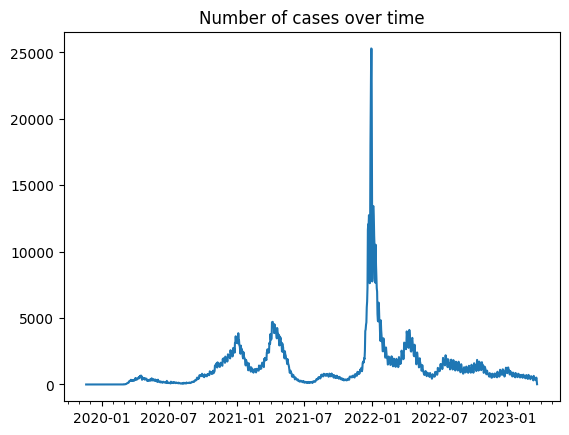

In [22]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

fig = plt.figure()
ax = plt.axes()

x = agg['Accurate_Episode_Date']
y = agg['Row_ID']
ax.plot(x, y)

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title("Number of cases over time")

<div style="padding: 10px; border: 2px black solid;">

## <font color='green'>New Tool Alert:</font> Matplotlib

<img src="https://matplotlib.org/_static/logo2_compressed.svg" alt="Matplotlib" style="height: 200px;"/>

**What is it**: Matplotlib is a python library for plotting and data visualization. 

**Why use it**: It's free and open source and extremely customizable. 

**Download**: Install it by using pip ```pip install matplotlib```

**Resources**: Cheat sheet [here](https://raw.githubusercontent.com/matplotlib/cheatsheets/master/cheatsheets-1.png)
    
</div>

We have a timeseries problem. Let's get the data in shape for it. Let's drop any data in 2019 as the tail is not going to be as relevant for predicting the most recent data. 

In [23]:
agg.head()

,Accurate_Episode_Date,Row_ID
8,2019-11-20,1
9,2019-12-18,1
10,2020-01-01,2
11,2020-01-10,1
12,2020-01-16,1


In [24]:
agg.tail()

,Accurate_Episode_Date,Row_ID
1151,2023-03-18,325
1152,2023-03-19,336
1153,2023-03-20,518
1154,2023-03-21,306
1155,2023-03-22,21


In [25]:
agg = agg.drop(agg.loc[agg.Accurate_Episode_Date < '2020-01-01'].index)

In [26]:
agg.head()

,Accurate_Episode_Date,Row_ID
10,2020-01-01,2
11,2020-01-10,1
12,2020-01-16,1
13,2020-01-21,1
14,2020-01-22,2


In [27]:
agg['t-1'] = agg['Row_ID'].shift(1)
agg['t-2'] = agg['Row_ID'].shift(2)
agg['t-3'] = agg['Row_ID'].shift(3)
agg['t-4'] = agg['Row_ID'].shift(4)
agg['t-5'] = agg['Row_ID'].shift(5)
agg['t-6'] = agg['Row_ID'].shift(6)
agg['t-7'] = agg['Row_ID'].shift(7)
agg['t'] = agg['Row_ID']

In [28]:
agg.head(14)

,Accurate_Episode_Date,Row_ID,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t
10,2020-01-01,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
11,2020-01-10,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1
12,2020-01-16,1,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1
13,2020-01-21,1,1.0,1.0,2.0,NaN,NaN,NaN,NaN,1
14,2020-01-22,2,1.0,1.0,1.0,2.0,NaN,NaN,NaN,2
15,2020-01-24,1,2.0,1.0,1.0,1.0,2.0,NaN,NaN,1
16,2020-01-25,1,1.0,2.0,1.0,1.0,1.0,2.0,NaN,1
17,2020-01-27,1,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1
18,2020-01-29,1,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1
19,2020-01-31,1,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1


In [29]:
agg.dropna(how='any',inplace=True)

In [30]:
agg.head()

,Accurate_Episode_Date,Row_ID,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t
17,2020-01-27,1,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1
18,2020-01-29,1,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1
19,2020-01-31,1,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1
20,2020-02-01,1,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1
21,2020-02-02,1,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1


In [31]:
agg.tail()

,Accurate_Episode_Date,Row_ID,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t
1151,2023-03-18,325,411.0,491.0,512.0,538.0,648.0,308.0,408.0,325
1152,2023-03-19,336,325.0,411.0,491.0,512.0,538.0,648.0,308.0,336
1153,2023-03-20,518,336.0,325.0,411.0,491.0,512.0,538.0,648.0,518
1154,2023-03-21,306,518.0,336.0,325.0,411.0,491.0,512.0,538.0,306
1155,2023-03-22,21,306.0,518.0,336.0,325.0,411.0,491.0,512.0,21


In [32]:
x = agg[['t-1','t-2','t-3','t-4','t-5','t-6','t-7']]
y = agg['t']

test_size = 0.3
dataset_size = len(agg)
test_index = int(test_size * dataset_size)


x_train, x_test, y_train, y_test = x[:test_index], x[test_index:], y[:test_index], y[test_index:]

In [33]:
x.shape

(1139, 7)

In [34]:
y.shape

(1139,)

In [35]:
x_train.head()

,t-1,t-2,t-3,t-4,t-5,t-6,t-7
17,1.0,1.0,2.0,1.0,1.0,1.0,2.0
18,1.0,1.0,1.0,2.0,1.0,1.0,1.0
19,1.0,1.0,1.0,1.0,2.0,1.0,1.0
20,1.0,1.0,1.0,1.0,1.0,2.0,1.0
21,1.0,1.0,1.0,1.0,1.0,1.0,2.0


In [36]:
y_train.head()

17    1
18    1
19    1
20    1
21    1
Name: t, dtype: int64

## Modelling and Evaluation

<div style="padding: 10px; border: 2px black solid;">

## <font color='green'>New Tool Alert:</font> Scikit-Learn

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/1200px-Scikit_learn_logo_small.svg.png" alt="Sklearn" style="height: 200px;"/>

**What is it**: Scikit-Learn is a python library for machine learning. 

**Why use it**:  It has various classification, regression and clustering algorithms and is designed to run efficiently. 

**Download**: Install it by using pip ```pip install sklearn```

**Resources**: Library cheat sheet [here](https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2018/09/Python-Cheat-Sheet-for-Scikit-learn-Edureka.pdf?utm_source=blog&utm_medium=cheat-sheet&utm_campaign=Scikit-Cheat-Sheet-28-09-2018-AH). Model selection cheat sheet [here](https://scikit-learn.org/stable/_static/ml_map.png)
    
</div>

Which model to choose [cheat sheet](https://scikit-learn.org/stable/_static/ml_map.png)
<img src="https://scikit-learn.org/stable/_static/ml_map.png" />

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


regr = RandomForestRegressor()
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)
mean_absolute_error(y_test,y_pred)

533.6581453634085

In [45]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)
mean_absolute_error(y_test,y_pred)

286.8510875055125

In [46]:
from sklearn.linear_model import Lasso

regr = Lasso()
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)
mean_absolute_error(y_test,y_pred)

286.84327586124664

In [47]:
from sklearn.linear_model import Ridge

regr = Ridge()
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)
mean_absolute_error(y_test,y_pred)

286.85108437524536

In [48]:
from sklearn.svm import SVR

regr = SVR(kernel='rbf')
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)
mean_absolute_error(y_test,y_pred)

1312.2976568229467

## Deployment

<div style="padding: 10px; border: 2px black solid;">

## <font color='green'>New Tool Alert:</font> Docker

<img src="https://logos-world.net/wp-content/uploads/2021/02/Docker-Symbol.png" alt="Sklearn" style="height: 200px;"/>

**What is it**: Containerization tool mainly used for shipping and running applications quickly across different platforms

**Why use it**:  Four main advantages:
* Isolation: It helps us create an environment agnostic system. Your application runs smoothly on different platforms. This is essentially achieved using containers. 
* Portability: Since all of your dependencies are in the same container, it’s easy to carry from one place to another giving Docker its portability.
* Lightweight: Runs as another application on your system instead of consuming whole lot resources of your system.
* Robustness: Less demanding in terms of hardware and needs very little memory as compared to VMs, hence providing efficient isolation levels which help save not only the cost but also time.

**Download**: Download it from [here](https://docs.docker.com/get-docker/)

**Resources**: Cheat sheet [here](https://www.docker.com/sites/default/files/d8/2019-09/docker-cheat-sheet.pdf)
    
</div>

Now that you have a model you have to figure out how you want to present the results and deploy it into production. This could be in the form of a visualization in tableau or powerbi, it could be in the form of an email to your boss that gets sent every day, the numbers itself could be displayed live on a site or so much more. 

Depending on the use case, it may make sense to deploy the model into the cloud and let it run there automatically. Below I will introduce a few more tools for you to be aware of

You can see that there in the deploy folder, key aspects of the code have been moved over to a ```deploy.py``` foldere. Furthermore there is a new file called a ```Dockerfile``` that specifies the instructions for running the deploy file. If you have docker installed locally, you can try to build the image using the ```docker build -t dstools:1.0 .``` command and then run it using ```docker run dstools:1.0``` 

This docker folder can now be run on the cloud, someone else's computer or anywhere that has docker installed. If you want to deploy your own model, you can use a cloud infrastructure provider such as AWS, GCP, or Azure or use a platform as a service provider such as Heroku.